### Thera Bank Personal Loan Campaign Project 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(color_codes=True)
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
import statsmodels.api as sm
from scipy import stats

#### Attribute Information (For reference purposes)
1. ID: Customer ID
2. Age: Customer's age in completed years
3. Experience: #years of professional experience
4. Income: Annual income of the customer
5. ZIP Code: Home Address ZIP code.
6. Family: Family size of the customer
7. CCAvg: Avg. spending on credit cards per month 
8. Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
9. Mortgage: Value of house mortgage if any. 
10. Personal Loan: Did this customer accept the personal loan offered in the last campaign?
11. Securities Account: Does the customer have a securities account with the bank?
12. CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Does the customer use internet banking facilities?
14. Credit card: Does the customer use a credit card issued by the bank?


In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.dtypes # similar information using the .info() function

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

###### We have 13 integer column and 1 float column. Subsequently the identified coulmns with categorical data types would be converted to a category data type. 

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Experience column in the above table have some negative entries as seen from minimum value of -3 which is not appropraite. It might be drop before using for training the classification model

In [7]:
df.shape

(5000, 14)

Table have 5000 rows and 14 columns 

In [8]:
df.isnull().values.any()   # If there are any null values in data set

False

In [9]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Exploratory Data Analysis

###### Number of Unique in each columns

In [10]:
list_of_columns = list(df)               # create the list of columns headers 
df[list_of_columns].nunique()            # fetch the number of unique entries in each of the columns 

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

###### Number of people with zero mortgage

In [11]:
num = df[df['Mortgage'] == 0]                   
a = num['Mortgage'].value_counts()
b = a.to_string(index=False)
print('Number of people with zero Mortgage is =',b)

Number of people with zero Mortgage is =  3462


###### Number of people with zero credit card spending per month

In [12]:
num_1 = df[df['CreditCard'] == 0]
a_1 = num_1['CreditCard'].value_counts()
b_1 = a_1.to_string(index=False)
print('Number of people with zero credit card spending per month =',b_1)

Number of people with zero credit card spending per month =  3530


###### Value counts of all categorical columns

In [13]:
#Change Categorical Data types to Category 
df['CD Account'] = df['CD Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['Personal Loan'] = df['Personal Loan'].astype('category')
df['Securities Account'] = df['Securities Account'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')

In [14]:
df.info() # to check of columns have been converted to categorical 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(5), float64(1), int64(8)
memory usage: 376.6 KB


#### The Personal Loan, Securities Account, CD Account, Online and CreditCard columns have been converted to categorical data types as seen above. 

###### Summary of categrical data count 

In [15]:
for i in list(df.columns[df.dtypes=='category']):   # checking value counts of all category type columns
    print(df[i].value_counts())
    print()

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



## Univariate and Bivariate Analysis 

#### Univariate analysis of Continous variables 

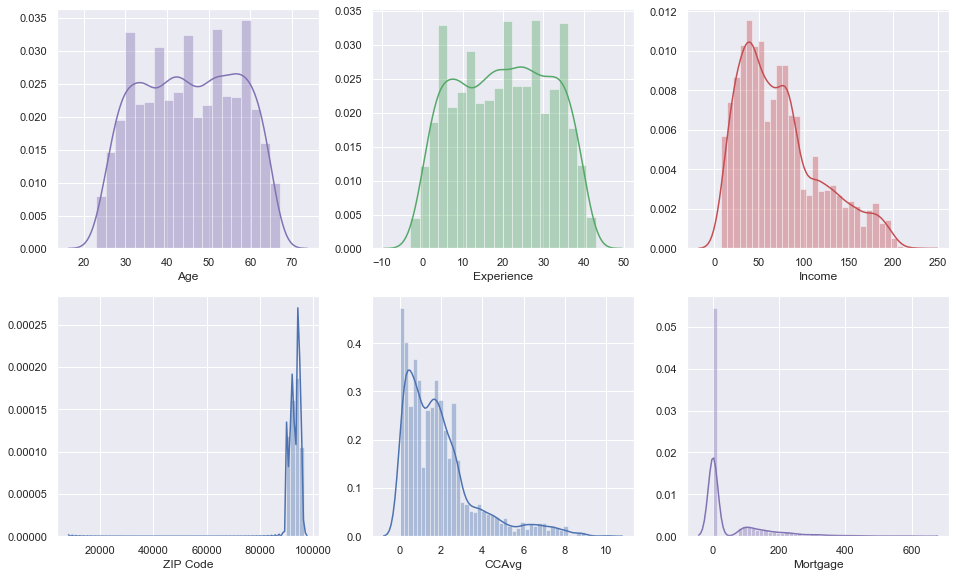

In [16]:
fig = plt.figure(figsize=[16,15])
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(3, 3, 1)
sns.distplot(df['Age'],ax=ax, color='m')

ax = fig.add_subplot(3, 3, 2)
sns.distplot(df['Experience'],ax=ax, color='g')

ax = fig.add_subplot(3, 3, 3)
sns.distplot(df['Income'],ax=ax, color='r')


ax = fig.add_subplot(3, 3, 4)
sns.distplot(df['ZIP Code'],ax=ax, color='b')

ax = fig.add_subplot(3, 3, 5)
sns.distplot(df['CCAvg'],ax=ax, color='b')

ax = fig.add_subplot(3, 3, 6)
sns.distplot(df['Mortgage'],ax=ax, color='m')


## Observations 
#### 1. Age and Experience are normally distributed as their mean and Q2 (second quartile) are very close in values. 
#### 2. Income, Zip Codes, CCAvg (Avg. spending on credit cards per month) and Morgage are skewed data. 
#### 3. Income, CCAvg and Morgage are skewed to the right while ZIP code is highly skewed to the left.. 
#### Futher assessment would involve Box plot to check for outliers. Univariate analysis were not used for categorical features in this section.

### Box plot of continous variables 

In [1]:
fig = plt.figure(figsize=[16,15])
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(3, 3, 1)
sns.boxplot(df['Age'],ax=ax, color='m')

ax = fig.add_subplot(3, 3, 2)
sns.boxplot(df['Experience'],ax=ax, color='g')

ax = fig.add_subplot(3, 3, 3)
sns.boxplot(df['Income'],ax=ax, color='r')


ax = fig.add_subplot(3, 3, 4)
sns.boxplot(df['ZIP Code'],ax=ax, color='b')

ax = fig.add_subplot(3, 3, 5)
sns.boxplot(df['CCAvg'],ax=ax, color='b')

ax = fig.add_subplot(3, 3, 6)
sns.boxplot(df['Mortgage'],ax=ax, color='m')


NameError: name 'plt' is not defined

## Observations 
#### 1. Age and Experience are well distrbuted as shown by the box plot 
#### 2. Income data has outliers which are seen beyond the maximum point (Q3 + 1.5*IQR). The median is closer to Q1(First quartile)
#### 3. Zip Code appeard skewed to the left due to a single outlier but has a mean value closer to the median as can be seen both from the Box plot and describe() function which makes it somewhat well distributed if that single point is taken off. See below figure 
#### 4. CCAvg is highly skewed to the right with high amount of outliers. Median is closer to Q1. 
#### 5. Mortgage is severly skewed to the right with highest amount of outliers. The median is equal to Q1. 

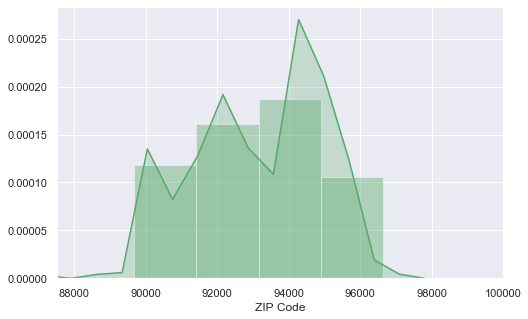

In [364]:
plt.figure(figsize=[8,5])   # plot to show how removing the first data point in zip code impacted the distribution
sns.distplot(df.iloc[1:len(df),4], color="g", kde_kws={"shade": True}) # plot after removing the first row in Zip code data
plt.xlim(87500, 100000);

## Observations
#### As explained earlier, the ZIP Code is almost normaly distributed if the single data point in the first row that causes the skewness is taken off. 

### Univariate Analysis of discrete and Categorical variables 

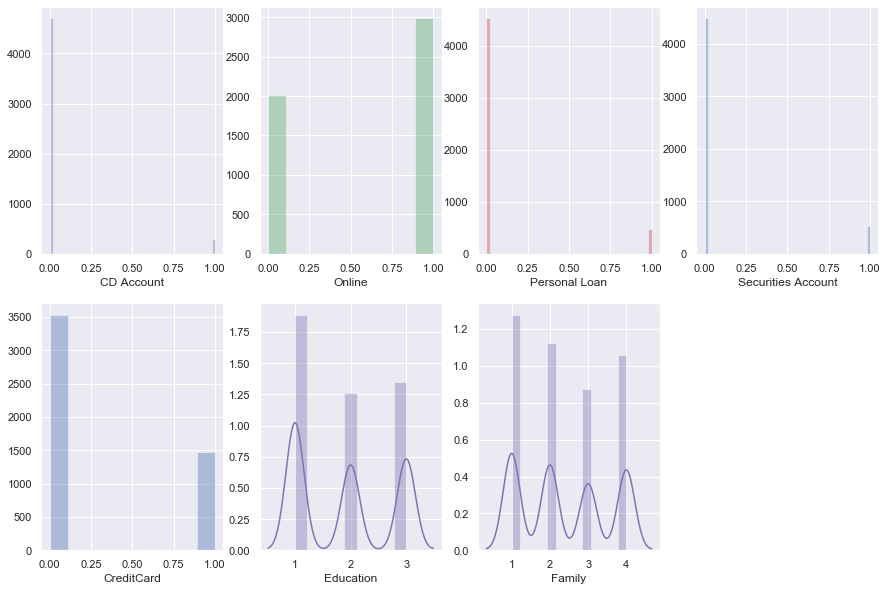

In [365]:
fig = plt.figure(figsize=[15,10])                           
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(2, 4, 1)
sns.distplot(df['CD Account'],ax=ax, color='m', kde = False)     #Categorical Variable 

ax = fig.add_subplot(2, 4, 2)
sns.distplot(df['Online'],ax=ax, color='g', kde = False)          #Categorical Variable

ax = fig.add_subplot(2, 4, 3)
sns.distplot(df['Personal Loan'],ax=ax, color='r', kde = False)   #Categorical Variable


ax = fig.add_subplot(2, 4, 4)
sns.distplot(df['Securities Account'],ax=ax, color='b', kde = False)  #Categorical Variable

ax = fig.add_subplot(2, 4, 5)
sns.distplot(df['CreditCard'],ax=ax, color='b', kde = False)          #Categorical Variable

ax = fig.add_subplot(2, 4, 6)
sns.distplot(df['Education'],ax=ax, color='m')                       # Discrete Variable

ax = fig.add_subplot(2, 4, 7)
sns.distplot(df['Family'],ax=ax, color='m')                          # Discrete Variable

## Observations
#### 1. CD Account, Personal Loan, Securities Account and CreditCard all have higher negavite's (Zeros) than Positive's(ones). 
#### 2. The 'Online' data is the only categorical data with more positives than negatives. 
#### 3. Family and Education in this project shall be classified as discrete variable as they are integer with multiple levels. 
#### Generally, the categorical variables are skewed to favour negative's with fewer positives. True positive rate (Recall) have to be strongly considered.

### Bivariate Analysis with Pair Plots 

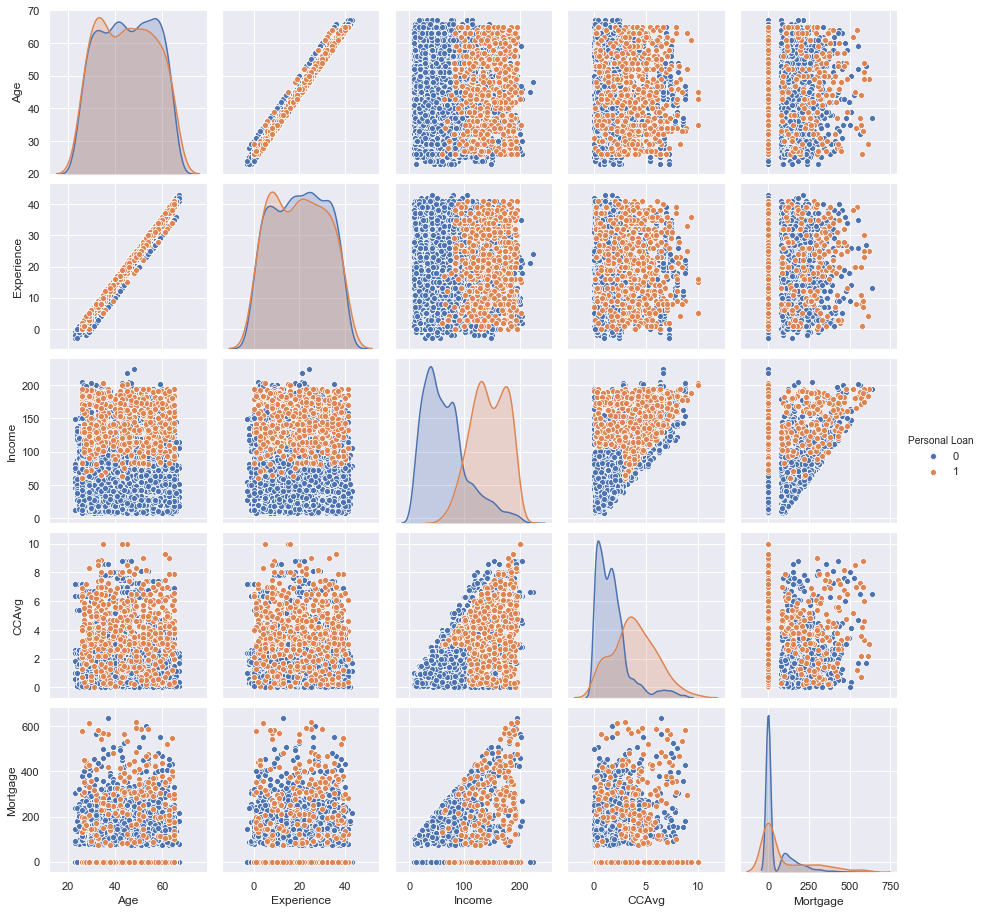

In [366]:
# Pair plots
sns.set(style='darkgrid')
sns.pairplot(df[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']], hue = 'Personal Loan'); 
# leaving out the categorical data to enable kde on the diagonal when a hue is applied                                                                                                        

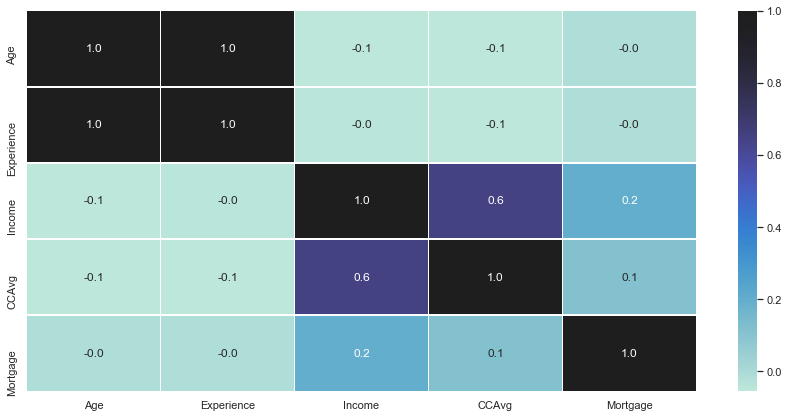

In [367]:
heat_mp = df[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']]
plt.figure(figsize=(15,7))
sns.heatmap(heat_mp.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

## Observations

#### No clear relationship exist between the variables except for Age and experience, income and CCAvg. Others have very poor correlation. 

### Bivariate Analysis Continued 

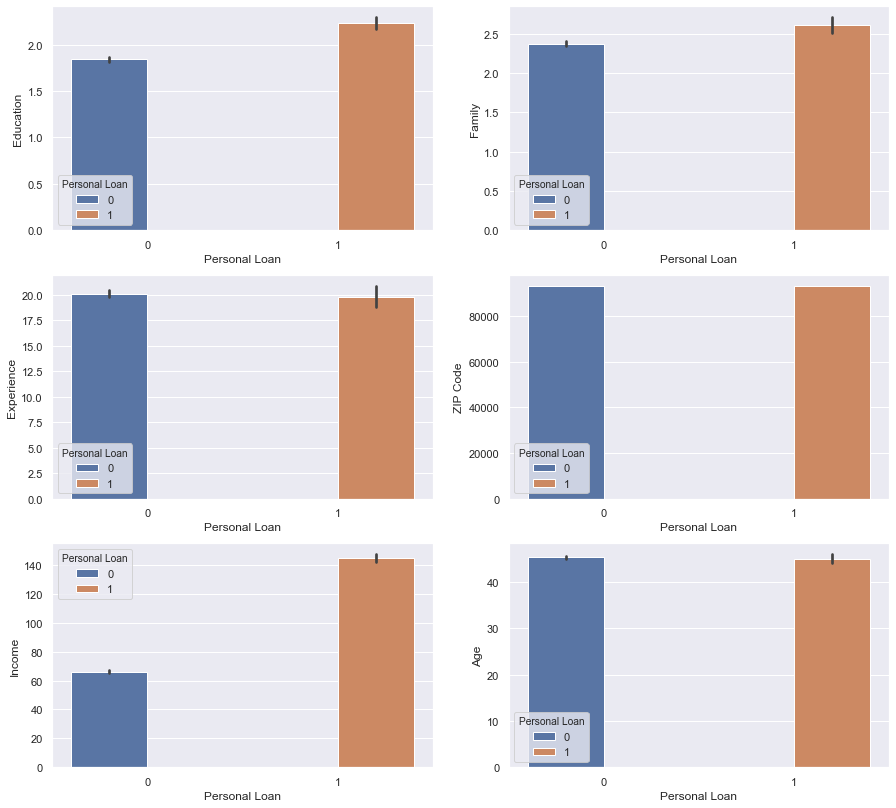

In [368]:
fig = plt.figure(figsize=[15,14])
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(3, 2, 1)
sns.barplot(df['Personal Loan'],df['Education'], hue = df['Personal Loan'] )

ax = fig.add_subplot(3, 2, 2)
sns.barplot(df['Personal Loan'],df['Family'], hue = df['Personal Loan'] )

ax = fig.add_subplot(3, 2, 3)
sns.barplot(df['Personal Loan'],df['Experience'], hue = df['Personal Loan'] )

ax = fig.add_subplot(3, 2, 4)
sns.barplot(df['Personal Loan'],df['ZIP Code'], hue = df['Personal Loan'] )

ax = fig.add_subplot(3, 2, 5)
sns.barplot(df['Personal Loan'],df['Income'], hue = df['Personal Loan'] )

ax = fig.add_subplot(3, 2, 6)
sns.barplot(df['Personal Loan'],df['Age'], hue = df['Personal Loan'] )

## Observations 
#### 1. Those with higher educational levels seems to accept more of the personal loan offered in the last campaign 
#### 2. Those with larger family size may likely accept more of the personal loan offered in another campaign 
#### 3. There are equal chances for those with high and low years of experience to accept  the personal loan offered in the last campaign. Same applies to Zip Code and Age 
#### 4. It is also clear that those with lower income would not likely accept a personal loan offer in another campaign. 


# Getting the Data for Model Ready 

# MODEL 1

In [369]:
df.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [370]:
DF1 = df.drop(['ID'], axis = 1) # drop ID identifier column as it is not important in model training 
DF1 = DF1[DF1['Experience'] > 0]  # drops rows where experience was negative. Negative experience is not realistic.
DF1.head(3)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


## Splitting the data and training with Logistic regression 

In [371]:
## Define X and Y variables
X = DF1.drop('Personal Loan', axis=1)  
y = DF1['Personal Loan']     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [372]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

#predict on test
y_predict = model.predict(X_test)

## Evaluating the model performance 

In [373]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9022534386889084

Testing accuracy 0.9187713310580204

Confusion Matrix


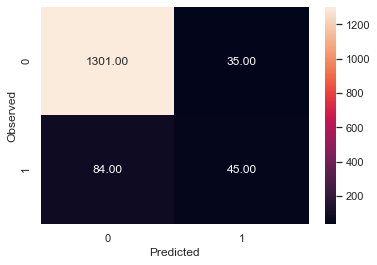

None

Recall: 0.3488372093023256

Precision: 0.5625

F1 Score: 0.4306220095693781

Roc Auc Score: 0.6613198022559533


In [374]:
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

## Checks For Model Improvement From Statistical Analysis of Logistic Regression Results

In [375]:
#Build the logistic regression model
logit = sm.Logit(y_train, sm.add_constant(X_train.astype(float)))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.132803
         Iterations 9


C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [376]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3417
Model:                          Logit   Df Residuals:                     3404
Method:                           MLE   Df Model:                           12
Date:                Fri, 08 May 2020   Pseudo R-squ.:                  0.5933
Time:                        21:19:32   Log-Likelihood:                -453.79
converged:                       True   LL-Null:                       -1115.9
Covariance Type:            nonrobust   LLR p-value:                3.138e-276
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.2775      5.036     -2.636      0.008     -23.149      -3.406
Age                   -0.1067      0.075     -1.414      0.157      -0.254       0.041
Experience          

### Zip Code and Mortgage have high P values and falls into the class of the variables not to include in the model, how ever, we will drop Zip Code first and check for improvement after which we drop both and also check for improvement. 

### Droping the Zip Code column and re-running the regression. 

# MODEL 2

In [377]:
X1 = DF1.drop(['Personal Loan','ZIP Code'], axis=1)  
y1 = DF1['Personal Loan']     
X1.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0


In [378]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

# Fit the model on train
model1 = LogisticRegression(solver="liblinear")
model1.fit(X_train, y_train)

#predict on test
y_predict1 = model1.predict(X_test)
m = y_test

In [379]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9458589405911618

Testing accuracy 0.9590443686006825

Confusion Matrix


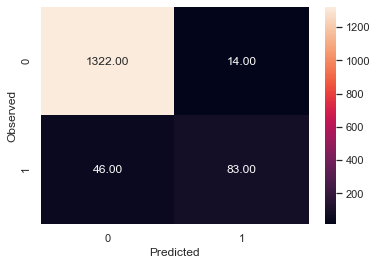

None

Recall: 0.6434108527131783

Precision: 0.8556701030927835

F1 Score: 0.7345132743362832

Roc Auc Score: 0.8164659053985053


In [380]:
print("Trainig accuracy",model1.score(X_train,y_train))  
print()
print("Testing accuracy",model1.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict1))
print()
print("Recall:",recall_score(y_test,y_predict1))
print()
print("Precision:",precision_score(y_test,y_predict1))
print()
print("F1 Score:",f1_score(y_test,y_predict1))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict1))

### There was a tremendous improvement in model metrics after dropping the Zip code column

### I will try and drop both the Zip Code and Mortgage column and check if there was improvement.  

# MODEL 3

In [381]:
X2 = DF1.drop(['Personal Loan','ZIP Code','Mortgage'], axis=1)  
y2 = DF1['Personal Loan']     
X2.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,1,0,0,0
1,45,19,34,3,1.5,1,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0


In [382]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

# Fit the model on train
model2 = LogisticRegression(solver="liblinear")
model2.fit(X_train, y_train)

#predict on test
y_predict2 = model2.predict(X_test)

In [383]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9455662862159789

Testing accuracy 0.9583617747440273

Confusion Matrix


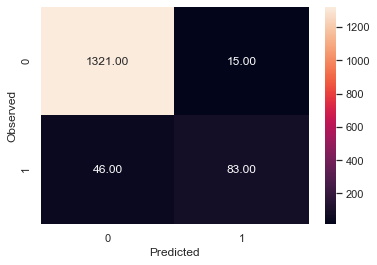

None

Recall: 0.6434108527131783

Precision: 0.8469387755102041

F1 Score: 0.7312775330396477

Roc Auc Score: 0.8160916539014994


In [384]:
print("Trainig accuracy",model2.score(X_train,y_train))  
print()
print("Testing accuracy",model2.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict2))
print()
print("Recall:",recall_score(y_test,y_predict2))
print()
print("Precision:",precision_score(y_test,y_predict2))
print()
print("F1 Score:",f1_score(y_test,y_predict2))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict2))

## Final Choice of a Model would be MODEL 2. Reasons are:
##### 1. while the Recall seems the same, other performance metrics for MODEL 2 is higher than MODEL 3
##### 2. Dropping Mortgage data would be a kind of loss of information that have to do with customer's relationship with the bank, so it can be included in the model 

# Business Understanding of The Model

**Confusion matrix means**

*True Positive (observed=1,predicted=1):*

Predicted that a customer would accept a personal loan and it came out true 

*False Positive (observed=0,predicted=1):*

Predicted that a customer would accept a personal loan and it came out False 

*True Negative (observed=0,predicted=0):*

Predicted that a customer would not accept a personal loan and it came out true 

*False Negative (observed=1,predicted=0):*

Predicted that a customer would not accept a personal loan and it came out False 

Here, Thera Bank want to find a way of converting their liability customers to personal loan customers. The retail marketing department would have to work towards increasing the success ratio with a minimal budget. This is a major driver.

Based on this driver and the fact that minimization of budget is required, an effort to achieve higher amount of **True Positive Rate(TRP) or Sensitivity or Recall** should be the major focus. If larger amount of False Positive is seen, then it is a loss to the bank as it will give a false impression that huge amount of liability customers would accept a personal loan in the next campaign. A false positive of this kind could cause the following challenges to the bank:

1. The risk of an unexpectedly high level of loan defaults due to False Positives. The bank will loose money. 
2. More liabilites (deposits of customers, mortgage, etc) would be lost as it is used up for personal loan
3. The bank might generally loose some customers in the process due to inadequacies

Hence, the most important metric is Recall (sensitivity or TRP) and have to be improved on.

In case of False negatives, bank will still retain their liability customers but might not be encouraged to lunch a canpaign for personal loan. That is fine as it will not make them loose their customer base with their liabilites still retained. It is a prefered option to giving out much loan and getting a high level of defaults. That will make the company loose so much. 

After achieving the desired accuracy, the model could be deployed for use. The bank would be more efficient in deciding how to handle personal loan issues. 